# Módulo 2 - Python Data Science

# 3. Introdução às bases de dados e modelos

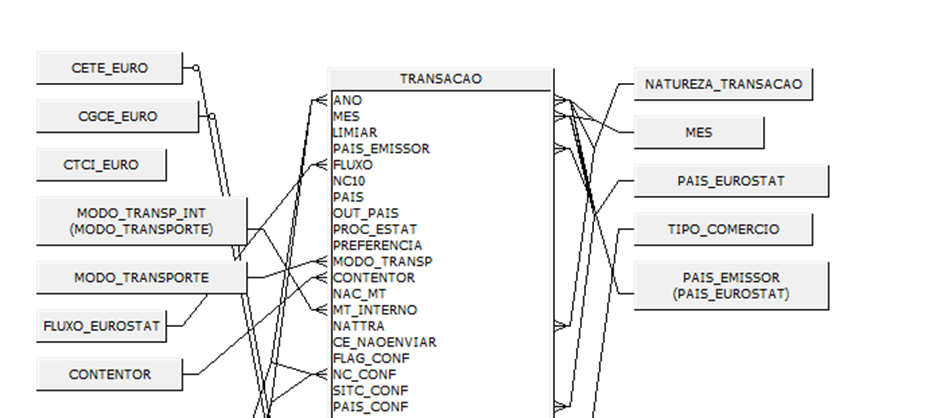

# 4. Conexões às bases de dados, engines and connection strings


## 4.1 Estabelecer uma conexão com host, port e service

In [2]:
# importar package 
import cx_Oracle # cx_Oracle to access Oracle database

In [3]:
# criar conexão
# host = c21oradev01.int.ine.pt
# port = 1521
# service =FORMACAO
dsn_tns = cx_Oracle.makedsn('c21oradev01.int.ine.pt', '1521', 
                            service_name='FORMACAO') 

## 4.2 Identificar o utilizador e password a utilizar

In [4]:
# importar package em vez do package todo
# trazer só o método getpass
from getpass import getpass # para ler a password sem a mostrar

In [5]:
my_user = input('User: ')

User: SONIA.QUARESMA


In [6]:
my_password = getpass()

········


In [7]:
# Criar a conexão com todos os elementos,
# incluingo user e password
conn = cx_Oracle.connect(user=my_user, password=my_password, dsn=dsn_tns) 

DatabaseError: DPI-1047: Cannot locate a 64-bit Oracle Client library: "The specified module could not be found". See https://cx-oracle.readthedocs.io/en/latest/user_guide/installation.html for help

## 4.3 Criar e abrir um cursor usando a conexão

In [ ]:
# Criar o cursor na conexão conn que criámos antes
c = conn.cursor()

## 4.4 Construir a query com SQL 

In [ ]:
# Criar uma variável string que vai receber a query em SQL
my_sql = """SELECT ano, nordem, nuts2, dtcc_cod, ent_cod
FROM BDIFRM.TD_HOSP_10
"""

In [ ]:
# executar o cursor c com a string como parâmetro
c.execute(my_sql)

In [ ]:
# guardar os dados numa estrutura Python Pandas
import pandas as pd

df = pd.DataFrame(c.fetchall())

## 4.5 Fechar o cursor

In [ ]:
c.close()

## 4.6 Fechar a conexão à Base de Dados

In [ ]:
conn.close()

## 4.7 Explorar os Dados

In [ ]:
df.head()

In [ ]:
# atribuir os nomes das colunas
nomes_col = ["ano", "nordem", "nuts2", "dtcc_cod", "ent_cod"]
df.columns = nomes_col

In [ ]:
df.head()

## 4.8 Guardar Dados

In [ ]:
df.to_csv('C:/Users/sonia.quaresma/PythonPlayground/datasets/tsee_2023.csv', index=False)
    

# 5. Queries SQL e pesquisas em base de dados

SELECT ano, HP.ent_cod, dtcc_cod, MN.CC_DSG, hp.nuts3_cod, 
sum(rh1.c21041) as card_t, sum(rh1.c21042) as card_h, sum(rh1.c21043) as card_m <br>
FROM TD_HOSP_10  HP <br>
INNER JOIN td_mun_10 MN USING (dtcc_cod) <br>
INNER JOIN td_rechum1_10 rh1 USING (nordem, ano) <br>
WHERE HP.NUTS3_COD like '%162%' <br>
GROUP BY ano, HP.ent_cod, dtcc_cod, MN.CC_DSG, hp.nuts3_cod <br>

# 6. Exploração do package Pandas

In [9]:
# tal como usamos por convenção np para Numpy
# vamos usar pd para Pandas
import numpy as np
import pandas as pd

Os objetos Pandas podem ser vistos como matrizes estruturadas NumPy nas quais as linhas e colunas são identificadas com labels ou rótulos em vez de índices simples. <br>
O Pandas fornece uma série de ferramentas, métodos e funcionalidades úteis além das 3 estruturas de dados fundamentais: Series, DataFrame e Index.

# 7. Series e Dataframes

## 7.1 Series

In [10]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [11]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

In [12]:
data.index

RangeIndex(start=0, stop=4, step=1)

### 7.1.1 Aceder aos elementos da Series

In [13]:
# acesso ao 2º elemento
# lembrar que começa em 0
data[1]

0.5

In [14]:
# acesso a 2 elementos no meio da Series 
# tal como no Numpy o último não está contido
data[1:3]

1    0.50
2    0.75
dtype: float64

In [15]:
# acesso a todos os elementos a partir do 3º
data[2:]

2    0.75
3    1.00
dtype: float64

### 7.1.2 Indexes nos objectos Series

In [16]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [17]:
data['b']

0.5

In [18]:
population_dict = {'Lisboa': 544325,'Sintra': 385989, 'Vila Nova de Gaia': 304233,
                   'Porto': 231834, 'Cascais': 214239, 'Loures': 201349,
                   'Braga': 193324, 'Almada': 177943}
population = pd.Series(population_dict)
population

Lisboa               544325
Sintra               385989
Vila Nova de Gaia    304233
Porto                231834
Cascais              214239
Loures               201349
Braga                193324
Almada               177943
dtype: int64

In [19]:
population['Cascais']

214239

In [20]:
population['Sintra':'Braga']

Sintra               385989
Vila Nova de Gaia    304233
Porto                231834
Cascais              214239
Loures               201349
Braga                193324
dtype: int64

### 7.1.3 Construir objectos do tipo Series
São sempre construídos com uma variação de **pd.Series(data, index=índice)**
onde index é um argumento opcional e data podem ser várias entidades

In [21]:
pd.Series([2, 4, 6])

0    2
1    4
2    6
dtype: int64

In [22]:
pd.Series(10, index=[10, 20, 30])

10    10
20    10
30    10
dtype: int64

In [23]:
pd.Series({2:'a', 1:'b', 3:'c'})

2    a
1    b
3    c
dtype: object

In [24]:
pd.Series({'a':1.2, 'b':1.5, 'c':1.7})

a    1.2
b    1.5
c    1.7
dtype: float64

## 7.2 DataFrames
Os objectos DataFrames, tal como os objectos Series podem ser vistos como uma generalização de um Array Numpy ou como uma especialização de um dicionário Python.<br>
*Series* é como uma matriz unidimensional com índices explícitos
*DataFrame* é como uma matriz bidimensional com índices explícitos de linha e coluna, ou seja uma sequência de objetos Series alinhados, i.e. que partilham o mesmo índice.

### 7.2.1 Construir objectos do tipo DataFrames

In [25]:
area_dict = {'Lisboa': 100.1,'Sintra': 23.8, 'Vila Nova de Gaia': 56.3,
                   'Porto': 41.4, 'Cascais': 97.1, 'Loures': 11.8,
                   'Braga': 41, 'Almada': 14.7}
area = pd.Series(area_dict)
area

Lisboa               100.1
Sintra                23.8
Vila Nova de Gaia     56.3
Porto                 41.4
Cascais               97.1
Loures                11.8
Braga                 41.0
Almada                14.7
dtype: float64

In [26]:
population

Lisboa               544325
Sintra               385989
Vila Nova de Gaia    304233
Porto                231834
Cascais              214239
Loures               201349
Braga                193324
Almada               177943
dtype: int64

In [27]:
cities = pd.DataFrame({'population': population,
                       'area': area})
cities

,population,area
Lisboa,544325,100.1
Sintra,385989,23.8
Vila Nova de Gaia,304233,56.3
Porto,231834,41.4
Cascais,214239,97.1
Loures,201349,11.8
Braga,193324,41.0
Almada,177943,14.7


In [28]:
# atributo index 
cities.index

Index(['Lisboa', 'Sintra', 'Vila Nova de Gaia', 'Porto', 'Cascais', 'Loures',
       'Braga', 'Almada'],
      dtype='object')

In [29]:
# atributo columns 
cities.columns

Index(['population', 'area'], dtype='object')

In [30]:
# a partir de um único objecto Series
pd.DataFrame(population, columns=['population'])

,population
Lisboa,544325
Sintra,385989
Vila Nova de Gaia,304233
Porto,231834
Cascais,214239
Loures,201349
Braga,193324
Almada,177943


In [31]:
# a partir de um array Numpy 2D
pd.DataFrame(np.random.rand(3, 2),
             columns=['col1', 'col2'],
             index=['a', 'b', 'c'])

,col1,col2
a,0.559314,0.853333
b,0.083959,0.996736
c,0.140224,0.359496


In [33]:
# a partir de uma lista de dicionarios
data = [{'simples': i, 'dobro': 2 * i, 'triplo': 3 * i}
        for i in range(6)]
pd.DataFrame(data)

,simples,dobro,triplo
0,0,0,0
1,1,2,3
2,2,4,6
3,3,6,9
4,4,8,12
5,5,10,15


In [34]:
# se algumas chaves do dicionário estiverem em falta
# vão ser preenchidas com o valor NaN
pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


In [35]:
# a partir de um dicionário
pd.DataFrame({'population': population,
              'area': area})

,population,area
Lisboa,544325,100.1
Sintra,385989,23.8
Vila Nova de Gaia,304233,56.3
Porto,231834,41.4
Cascais,214239,97.1
Loures,201349,11.8
Braga,193324,41.0
Almada,177943,14.7


### 7.2.2 Pandas Index

O **Index** pode ser visto como um array imutável. Ser imutável torna-o mais seguro e previne alterações fortuitas.

In [36]:
ind = pd.Index([2, 3, 5, 7, 11])
ind

Index([2, 3, 5, 7, 11], dtype='int64')

In [37]:
# funciona e acede-se como um array
ind[1]

3

In [38]:
# podem-se obter slices
ind[::2]

Index([2, 5, 11], dtype='int64')

In [39]:
# tem muitos atributos iguais
print(ind.size, ind.shape, ind.ndim, ind.dtype)

5 (5,) 1 int64


In [40]:
# mas é imutável, i.e. não pode ser alterado
# pelos meios habituais, por isso isto não funciona
ind[1] = 0

TypeError: Index does not support mutable operations

O **Index** também pode ser visto como um set ordenado oferecendo as mesmas operações de união, intersecção e diferenças que os sets (teoria de conjuntos).

In [42]:
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])

In [43]:
indA.intersection(indB)

Index([3, 5, 7], dtype='int64')

In [44]:
indA.union(indB)

Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')

In [45]:
indA.symmetric_difference(indB)

Index([1, 2, 9, 11], dtype='int64')

## 7.3 Selecção de Dados

### 7.3.1 Series

In [46]:
# semelhante ao dicionário, mapeia chaves para valores
import pandas as pd
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [47]:
data['b']

0.5

In [48]:
# verifica se tem esta chave (key)
'a' in data

True

In [49]:
# acede a todas as chaves (keys)
data.keys()

Index(['a', 'b', 'c', 'd'], dtype='object')

In [51]:
data.items()

In [50]:
# acede a todos os valores (items)
list(data.items())

[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

In [52]:
# expande a series acrescentando um elemento
data['e'] = 1.25
data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

In [53]:
# altera a série mapeando a key b oara 0.48 em vez de 0.5
data['b'] = 0.48
data

a    0.25
b    0.48
c    0.75
d    1.00
e    1.25
dtype: float64

In [54]:
# slicing com index explicito
data['a':'c']

a    0.25
b    0.48
c    0.75
dtype: float64

In [55]:
# slicing com index implicito
data[0:2]

a    0.25
b    0.48
dtype: float64

In [56]:
# masking 
data[(data > 0.3) & (data < 0.8)]

b    0.48
c    0.75
dtype: float64

In [57]:
# fancy indexing
data[['a', 'e']]

a    0.25
e    1.25
dtype: float64

### 7.3.2 Indexers: loc e iloc

In [58]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data

1    a
3    b
5    c
dtype: object

In [59]:
# indice explicito 
data.loc[1]

'a'

In [60]:
# indice explicito 
data.loc[1:3]

1    a
3    b
dtype: object

In [61]:
# indice implicito
data.iloc[1]

'b'

In [63]:
# indice implicito 
data.iloc[1:3]

3    b
5    c
dtype: object

### 7.3.3 DataFrames

In [64]:
pop = pd.Series({'Lisboa': 544325,'Sintra': 385989, 'Vila Nova de Gaia': 304233,
                   'Porto': 231834, 'Cascais': 214239, 'Loures': 201349,
                   'Braga': 193324, 'Almada': 177943})

area = pd.Series({'Lisboa': 100.1,'Sintra': 23.8, 'Vila Nova de Gaia': 56.3,
                   'Porto': 41.4, 'Cascais': 97.1, 'Loures': 11.8,
                   'Braga': 41, 'Almada': 14.7})

data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
Lisboa,100.1,544325
Sintra,23.8,385989
Vila Nova de Gaia,56.3,304233
Porto,41.4,231834
Cascais,97.1,214239
Loures,11.8,201349
Braga,41.0,193324
Almada,14.7,177943


In [65]:
data['area']

Lisboa               100.1
Sintra                23.8
Vila Nova de Gaia     56.3
Porto                 41.4
Cascais               97.1
Loures                11.8
Braga                 41.0
Almada                14.7
Name: area, dtype: float64

In [66]:
data.area

Lisboa               100.1
Sintra                23.8
Vila Nova de Gaia     56.3
Porto                 41.4
Cascais               97.1
Loures                11.8
Braga                 41.0
Almada                14.7
Name: area, dtype: float64

In [67]:
data['dens'] = data['pop'] / data['area'] 
data

,area,pop,dens
Lisboa,100.1,544325,5437.812188
Sintra,23.8,385989,16218.025210
Vila Nova de Gaia,56.3,304233,5403.783304
Porto,41.4,231834,5599.855072
Cascais,97.1,214239,2206.374871
Loures,11.8,201349,17063.474576
Braga,41.0,193324,4715.219512
Almada,14.7,177943,12104.965986


In [68]:
# ver os dados como num array 2D
data.values

array([[1.00100000e+02, 5.44325000e+05, 5.43781219e+03],
       [2.38000000e+01, 3.85989000e+05, 1.62180252e+04],
       [5.63000000e+01, 3.04233000e+05, 5.40378330e+03],
       [4.14000000e+01, 2.31834000e+05, 5.59985507e+03],
       [9.71000000e+01, 2.14239000e+05, 2.20637487e+03],
       [1.18000000e+01, 2.01349000e+05, 1.70634746e+04],
       [4.10000000e+01, 1.93324000e+05, 4.71521951e+03],
       [1.47000000e+01, 1.77943000e+05, 1.21049660e+04]])

In [69]:
# transposicao para trocar linhas com colunas
data.T

,Lisboa,Sintra,Vila Nova de Gaia,Porto,Cascais,Loures,Braga,Almada
area,100.100000,23.80000,56.300000,41.400000,97.100000,11.800000,41.000000,14.700000
pop,544325.000000,385989.00000,304233.000000,231834.000000,214239.000000,201349.000000,193324.000000,177943.000000
dens,5437.812188,16218.02521,5403.783304,5599.855072,2206.374871,17063.474576,4715.219512,12104.965986


In [70]:
# aceder a linha
data.values[0]

array([1.00100000e+02, 5.44325000e+05, 5.43781219e+03])

In [71]:
# aceder a coluna 
data['area']

Lisboa               100.1
Sintra                23.8
Vila Nova de Gaia     56.3
Porto                 41.4
Cascais               97.1
Loures                11.8
Braga                 41.0
Almada                14.7
Name: area, dtype: float64

In [72]:
# aceder usando os indices implicitos inteiros
# as primeiras 3 linhas, 0, 1 e 2
# as primeiras 2 colunas 0 e 1
data.iloc[:3, :2]

,area,pop
Lisboa,100.1,544325
Sintra,23.8,385989
Vila Nova de Gaia,56.3,304233


In [73]:
# aceder àos mesmos dados que anteriormente
# agora usando os indices explicitos 
data.loc[:'Vila Nova de Gaia', :'pop']

,area,pop
Lisboa,100.1,544325
Sintra,23.8,385989
Vila Nova de Gaia,56.3,304233


In [74]:
data.loc[data.dens > 10000, ['pop', 'dens']]

,pop,dens
Sintra,385989,16218.025210
Loures,201349,17063.474576
Almada,177943,12104.965986


In [75]:
data.loc[data['dens'] > 10000, ['pop', 'dens']]

,pop,dens
Sintra,385989,16218.025210
Loures,201349,17063.474576
Almada,177943,12104.965986


In [76]:
data.iloc[0, 2] = 5000
data

,area,pop,dens
Lisboa,100.1,544325,5000.000000
Sintra,23.8,385989,16218.025210
Vila Nova de Gaia,56.3,304233,5403.783304
Porto,41.4,231834,5599.855072
Cascais,97.1,214239,2206.374871
Loures,11.8,201349,17063.474576
Braga,41.0,193324,4715.219512
Almada,14.7,177943,12104.965986


### 7.3.4 Operações no Pandas

**np.random.default_rng(42)** cria uma instância da classe gerador do módulo numpy.random module. Este gerador baseado no algoritmo PCG64 é um gerador de números pseudo-random que na realidade é determinado pelo valor inicial da seed, neste caso 42.

In [77]:
# criação de Series com números aleatórios 
# entre 0 e 10 (exclusive) e 4 linhas
# a seed está fixa a 42
rng = np.random.default_rng(42)
ser = pd.Series(rng.integers(0, 10, 4))
ser

0    0
1    7
2    6
3    4
dtype: int64

Nas operações unárias como a negação e funções trigonométricas estas funções preservam as etiquetas de indices e colunas.

In [78]:
# a função unária preserva os indices
np.exp(ser)

0       1.000000
1    1096.633158
2     403.428793
3      54.598150
dtype: float64

In [79]:
# criação de dataFrame com números aleatórios entre
# 0 e 10 (exclusive) e 3 linhas e 4 colunas
df = pd.DataFrame(rng.integers(0, 10, (3, 4)),
                  columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,4,8,0,6
1,2,0,5,9
2,7,7,7,7


In [80]:
# a função unária preserva os indices
np.sin(df * np.pi / 4)

,A,B,C,D
0,1.224647e-16,-2.449294e-16,0.000000,-1.000000
1,1.000000e+00,0.000000e+00,-0.707107,0.707107
2,-7.071068e-01,-7.071068e-01,-0.707107,-0.707107


Nas operações binárias como a soma e a multiplicação o Pandas alinha os indices ao passar os objectos para as ufunc. <br>
Nos items para os quais não há uma entrada é colocado o valor **NaN**, "Not a Number" que é como o Pandas marca valores em falta (*missing data*)

In [81]:
pop_u = pd.Series({'Lisboa': 544325,'Sintra': 385989, 'Vila Nova de Gaia': 304233}, name='pop')

area_u = pd.Series({'Sintra': 23.8, 'Vila Nova de Gaia': 56.3, 'Porto': 41.4}, name='area')

pop_u / area_u

Lisboa                        NaN
Porto                         NaN
Sintra               16218.025210
Vila Nova de Gaia     5403.783304
dtype: float64

In [82]:
area.index.union(pop.index)

Index(['Lisboa', 'Sintra', 'Vila Nova de Gaia', 'Porto', 'Cascais', 'Loures',
       'Braga', 'Almada'],
      dtype='object')

In [83]:
# se os indices forem numéricos ficam ordenados
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])
A + B

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

In [84]:
# existem várias hipóteses para lidar com missing values
A.add(B, fill_value=0)

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

In [85]:
A = pd.DataFrame(rng.integers(0, 20, (2, 2)),
                 columns=['a', 'b'])
A

,a,b
0,10,2
1,16,9


In [86]:
B = pd.DataFrame(rng.integers(0, 10, (3, 3)),
                 columns=['b', 'a', 'c'])
B

,b,a,c
0,5,3,1
1,9,7,6
2,4,8,5


In [87]:
# exemplo de alinhamento de indices nas DataFrames
A + B

,a,b,c
0,13.0,7.0,NaN
1,23.0,18.0,NaN
2,NaN,NaN,NaN


In [88]:
A.values.mean()

9.25

In [89]:
# outra forma de lidar com missing values
A.add(B, fill_value=A.values.mean())

,a,b,c
0,13.00,7.00,10.25
1,23.00,18.00,15.25
2,17.25,13.25,14.25


##### Ufuncs: Operações entre DataFrames e Series

In [90]:
A = rng.integers(10, size=(3, 4))
A

array([[4, 4, 2, 0],
       [5, 8, 0, 8],
       [8, 2, 6, 1]], dtype=int64)

In [91]:
# subtrai a todas as linhas a primeira
A - A[0]

array([[ 0,  0,  0,  0],
       [ 1,  4, -2,  8],
       [ 4, -2,  4,  1]], dtype=int64)

In [92]:
# igual ao exemplo anterior mas usando indices explicitos
df = pd.DataFrame(A, columns=['Q', 'R', 'S', 'T'])
df - df.iloc[0]

,Q,R,S,T
0,0,0,0,0
1,1,4,-2,8
2,4,-2,4,1


In [93]:
# Subtrair uma coluna em vez de uma linha
# não esquecer de indicar axis = 0
df.subtract(df['R'], axis=0)

,Q,R,S,T
0,0,0,-2,-4
1,-3,0,-8,0
2,6,0,4,-1


In [94]:
print(df.head())
meialinha = df.iloc[1, ::2]
meialinha

   Q  R  S  T
0  4  4  2  0
1  5  8  0  8
2  8  2  6  1


Q    5
S    0
Name: 1, dtype: int64

In [95]:
# alinha os indices antes da operação
# por isso só vai subtrair nas colunas Q (5) e S (0)
df - meialinha

,Q,R,S,T
0,-1.0,NaN,2.0,NaN
1,0.0,NaN,0.0,NaN
2,3.0,NaN,6.0,NaN


### 7.3.5 Missing values

O tipo *None* do Python também pode ser usado para marcar missing values, mas não suporta operações aritméticas. Assim o uso do **nan** é mais vantajoso.

In [96]:
# criação de um array com None a marcar missing values
vals1 = np.array([1, None, 2, 3])
vals1

array([1, None, 2, 3], dtype=object)

In [97]:
vals1.sum()

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

In [98]:
# criação de um array com nan a marcar missing values
vals2 = np.array([1, np.nan, 3, 4]) 
vals2

array([ 1., nan,  3.,  4.])

In [99]:
vals2.sum()

nan

Apesar de não dar erro o nan é como um **virus** infecta todos os objectos com que entra em contacto.

In [100]:
print(1 + np.nan)
print(0 * np.nan)
print(vals2.sum(), vals2.min(), vals2.max())

nan
nan
nan nan nan


O Pandas converte **None** em *nan* e por isso permite que ambos sejam usados em simultâneo

In [101]:
pd.Series([1, np.nan, 2, None])

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

Todos os tipos começados por maiuscula como Int32 podem ser nullable e por isso receber NaN, None ou NA

In [102]:
pd.Series([1, np.nan, 2, None, pd.NA], dtype='Int32')

0       1
1    <NA>
2       2
3    <NA>
4    <NA>
dtype: Int32

As estruturas de dados Pandas possuem vários métodos para detectar dados nulos: **isnull** , **isna** e **notnull**. Todos retornam uma máscara booleana.

In [103]:
data = pd.Series([1, np.nan, 'hello', None])
data

0        1
1      NaN
2    hello
3     None
dtype: object

In [104]:
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [105]:
data.isna()

0    False
1     True
2    False
3     True
dtype: bool

In [106]:
data.notnull()

0     True
1    False
2     True
3    False
dtype: bool

In [107]:
data[data.notnull()]

0        1
2    hello
dtype: object

Além destes métodos de diagnóstico temos mais 2 métodos muito úteis para lidar com missing values:<br>
 - dropna - remove os registos onde há variáveis sem valores <br>
 - fillna - preenche os valores nulos, tipicamente com zero, valores próximos (espacialmente acima ou abaixo na coluna) ou com uma média

In [108]:
data.dropna()

0        1
2    hello
dtype: object

In [109]:
df = pd.DataFrame([[1,      np.nan, 2],
                   [2,      3,      5],
                   [np.nan, 4,      6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [110]:
# remove registos com missing values
df.dropna()

,0,1,2
1,2.0,3.0,5


In [111]:
df = pd.DataFrame([[1,      np.nan, 2],
                   [2,      3,      5],
                   [np.nan, 4,      6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [112]:
# remove colunas indicando axis = 1
# também se pode indicar axis = columns' em vez de 1
df.dropna(axis = 1)

,2
0,2
1,5
2,6


dropna livra-nos do NaN mas exclui muitos dados, outra opção é só excluir colunas onde todos os valores sejam nulos

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [114]:
df.dropna(axis='columns', how='all')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


outra opção é preencher com um número válido:
- zeros <br>
- imputação de valor anterior (ou seguinte)
- média

In [115]:
df.fillna(0)

,0,1,2,3
0,1.0,0.0,2,0.0
1,2.0,3.0,5,0.0
2,0.0,4.0,6,0.0


In [125]:
# podemos fazer forward fill
df.ffill()

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,2.0,4.0,6,NaN


In [121]:
# backward fill
df.bfill()

,0,1,2,3
0,1.0,3.0,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [123]:
# Ou amobos
df.bfill().ffill()

,0,1,2,3
0,1.0,3.0,2,NaN
1,2.0,3.0,5,NaN
2,2.0,4.0,6,NaN


estas experiências não alteram mesmo a DataFrame se não usarmos o parâmetro inplace

In [126]:
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [127]:
df.dropna(axis='columns', how='all', inplace = True)

In [128]:
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [129]:
df.ffill(inplace = True)

In [130]:
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,2.0,4.0,6


depois de preenchermos com imputação do anterior e do seguinte podemos avaliar se ainda temos registos com missing values
esses registos podem ser preenchidos com a média da coluna por exemplo

In [131]:
df.isna()

,0,1,2
0,False,True,False
1,False,False,False
2,False,False,False


Mais útil do que obter a máscara booleana dos missing values é contar quantos temos numa coluna (

In [132]:
# proposta testa por partes a expressão
# estamos a examinar só a 2ª coluna
df.iloc[:,1].isna().sum()

1

In [133]:
df.iloc[:,1].fillna(df.iloc[:,1].mean())

0    3.5
1    3.0
2    4.0
Name: 1, dtype: float64

In [134]:
df.head()

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,2.0,4.0,6


In [135]:
df.describe()

,0,1,2
count,3.000000,2.000000,3.000000
mean,1.666667,3.500000,4.333333
std,0.577350,0.707107,2.081666
min,1.000000,3.000000,2.000000
25%,1.500000,3.250000,3.500000
50%,2.000000,3.500000,5.000000
75%,2.000000,3.750000,5.500000
max,2.000000,4.000000,6.000000


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       3 non-null      float64
 1   1       2 non-null      float64
 2   2       3 non-null      int64  
dtypes: float64(2), int64(1)
memory usage: 204.0 bytes


quando estamos a examinar uma coluna tb pode ser útil saber quantos valores unicos tem

In [137]:
# porque é que usamos o len
# e não o .sum()
len(df.iloc[:,0].unique())

2

In [138]:
sum(df.iloc[:,0].unique())

3.0

In [139]:
df.iloc[:,0].unique()

array([1., 2.])

In [140]:
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,2.0,4.0,6


In [141]:
valor, contador = np.unique(df.iloc[:,2], return_counts = True)
print(valor)
print(contador)

[2 5 6]
[1 1 1]


In [142]:
for valor, contador in zip(valor, contador):
    print(f"{valor} aparece {contador} vezes")

2 aparece 1 vezes
5 aparece 1 vezes
6 aparece 1 vezes


In [ ]:
# a função zip transforma 2 iteráveis num único iterável
# em que cada elemento é um par
cities = ['Elvas', 'Evora', 'Estremoz']
pop = [21750, 81127, 12750]
 
new_dict = {cities: pop for cities, pop in zip(cities, pop)}
print(new_dict)